## Fourier Series

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

#### The Square Function
Create a python function for the square function shown below.
This function has a period of $2\pi$ and alternates between $-1$ and $1$.

<img width=600px src="SquareFunction.png">

In [2]:
def squareFunction(x):
    ### TO DO: Create a square function
    period = 2 * np.pi
    n = x // period
    x2 = x - (n * period)
    
    if x2 > 0 and x2 < np.pi:
        y = 1
    elif x2 > np.pi and x2 < 2 * np.pi:
        y = -1
    else:
        y = 0

    return y

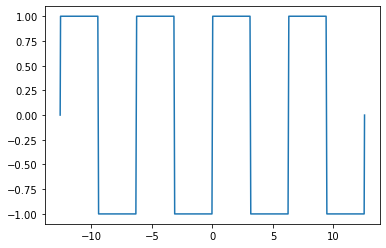

In [3]:
### TO DO: Plot the square function from (-4pi, 4pi)
xpoints = []
ypoints = []
for i in range(-4, 4):
    a = i
    for j in range(100):
        xpoints.append(a * np.pi)
        ypoints.append(squareFunction(a * np.pi))
        a += 1/100
xpoints.append(4 * np.pi)
ypoints.append(squareFunction(4 * np.pi))

plt.plot(xpoints, ypoints)
plt.show()

Visually, verify your plot matches the graph in the image above.

#### The Sine Series
Create a function that returns the sum of the first $k$ elements of the fourier sine series. 

In [4]:
def fourierSineSeries(k, bk, x):
    """
    Returns the sum of the first k elements of the fourier sine series
    Parameters:
        k: the number of elements to summate
        bk: the coefficients of each element
        x: the x value to evaluate
    Returns:
        The S(x) approximation using the fourier sine series
    """
    ### TO DO: Create the fourier sine series sum
    fourierSum = 0
    for i in range(k):
        fourierSum += bk[i] * np.sin(i * x)
    return fourierSum

#### Find the $b_k$ terms 
Using your square function and fourier sine series, find and plot the first 5, 10, and 100 $b_k$ terms for your square function. 

In order to find this coefficients, you'll have to use some integral function. I recommend using `quad` defined here: https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.quad.html

Recall the integral to find the $b_k$ coefficients is defined as:

$$b_k = \frac{2}{\pi} \int \limits^{\pi}_{0} S(x)sin(kx) dx $$

The quad function, and other pre-made integral functions take a function $f$ as a argument. In order to be able to give these integration functions a single function name, you may have to define an `integrand` function (provided below) that computes the value $S(x)sin(kx)$. 

In [5]:
def integrand(x, k):
    ### TO DO: Define S(x)sin(kx) integrand used to solve for the coefficients 
    return squareFunction(x) * np.sin(k * x)

In [6]:
## TO DO: Calculate the b_k coefficient values
bkValues = []

for k in range(100):
    bkValues.append((2 / np.pi) * quad(integrand, 0, np.pi, args = (k))[0])

Plot the sum of the first 5 elements in the fourier sine series for the square wave function.

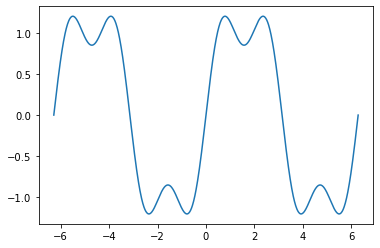

In [7]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 1000)
y = fourierSineSeries(5, bkValues, x)
plt.plot(x, y)
plt.show()

Plot the sum of the first 10 elements in the fourier sine series for the square wave function.

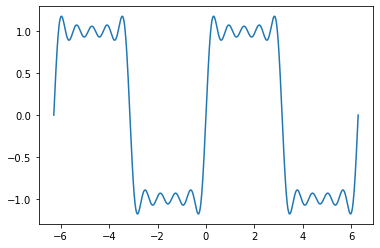

In [8]:
## TO DO: Plot the sum of the first 10coefficient  elements.
y = fourierSineSeries(10, bkValues, x)
plt.plot(x, y)
plt.show()

Plot the sum of the first 100 elements in the fourier sine series for the square wave function.

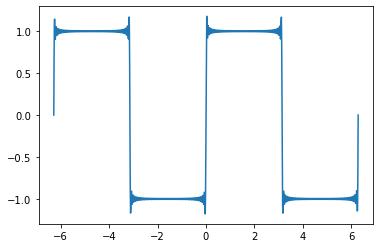

In [9]:
## TO DO: Plot the sum of the first 100 elements.
y = fourierSineSeries(100, bkValues, x)
plt.plot(x, y)
plt.show()